In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as lps
import esda
from splot.esda import lisa_cluster
import seaborn as sns
from esda.moran import Moran_BV

In [90]:
robos_cdmx = gpd.read_file('robos-cdmx.gpkg', layer='robos-cdmx', driver='GPKG')

c:\Users\herie\.conda\envs\GDA\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [91]:
homicidios_cdmx = gpd.read_file('homicidios-cdmx.gpkg', layer='homicidios-cdmx', driver='GPKG')

c:\Users\herie\.conda\envs\GDA\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


El archivo de datos deberá ser guardado en formato .gpkg y con EPSG: 6372.

In [92]:
robos_cdmx.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [93]:
robos_cdmx.head(3)

,Clave,Municipio,Poblacion Total,Total Año,Robos por cada 10 mil habitantes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,geometry
0,9002,Azcapotzalco,432205,3300.0,76.352657,300,269.0,296.0,258.0,272.0,285.0,258.0,278.0,291.0,283.0,275.0,235.0,"POLYGON ((2794859.977 837218.408, 2794861.69 8..."
1,9003,Coyoacán,614447,5885.0,95.777179,442,490.0,473.0,468.0,485.0,441.0,474.0,497.0,541.0,555.0,528.0,491.0,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,9004,Cuajimalpa de Morelos,217686,1044.0,47.958987,102,65.0,74.0,72.0,78.0,84.0,97.0,122.0,90.0,84.0,92.0,84.0,"POLYGON ((2787229.79 825329.285, 2787272.744 8..."


In [94]:
homicidios_cdmx.head(3)

,Clave,Municipio,Poblacion Total,Total Año,Homicidios por cada 10 mil habitantes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,geometry
0,9002,Azcapotzalco,432205,625.0,14.460730,56,47.0,67.0,59.0,45.0,45.0,48.0,37.0,49.0,52.0,63.0,57.0,"POLYGON ((2794859.977 837218.408, 2794861.69 8..."
1,9003,Coyoacán,614447,705.0,11.473732,63,68.0,64.0,55.0,60.0,60.0,59.0,44.0,46.0,60.0,60.0,66.0,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,9004,Cuajimalpa de Morelos,217686,286.0,13.138190,19,15.0,27.0,25.0,27.0,23.0,26.0,25.0,27.0,18.0,24.0,30.0,"POLYGON ((2787229.79 825329.285, 2787272.744 8..."


# **VISUALIZACIÓN DE LOS DATOS**

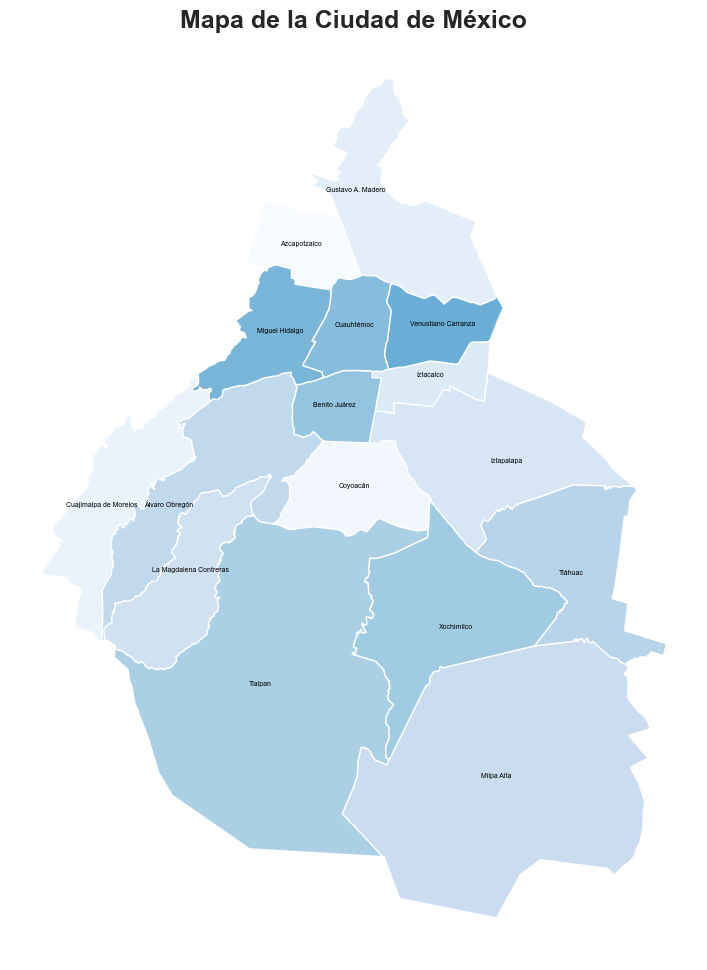

In [95]:
import numpy as np

import matplotlib.colors as mcolors

# Create a sub-colormap from the Blues palette (middle to dark)
blues_sub = plt.cm.Blues(np.linspace(0, 0.5, 256))
blues_cmap = mcolors.ListedColormap(blues_sub)

# Graficar el mapa con estilo mejorado
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

robos_cdmx.plot(ax=ax, cmap=blues_cmap)

# Agregar anotaciones con el nombre del municipio
for _, row in robos_cdmx.iterrows():
    # Usar representative_point() para que la etiqueta se ubique dentro del polígono
    point = row.geometry.representative_point()
    ax.annotate(text=row['Municipio'],
                xy=(point.x, point.y),
                horizontalalignment='center',
                fontsize=5,
                color='black')

ax.set_title("Mapa de la Ciudad de México", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.savefig('cdmx.svg', format='svg', bbox_inches='tight')
plt.show()

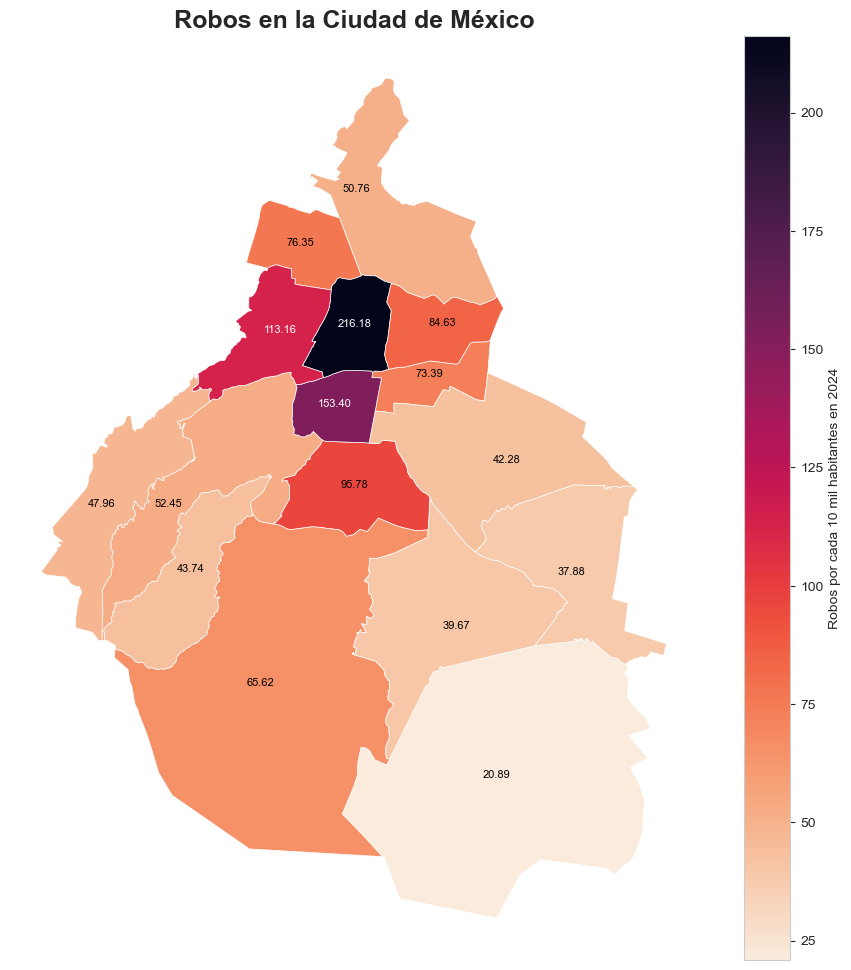

In [116]:
fig, ax = plt.subplots(figsize=(12, 12))

robos_cdmx.plot(column='Robos por cada 10 mil habitantes',
                ax=ax,
                legend=True,
                edgecolor="white",
                linewidth=.5,
                cmap="rocket_r", 
                legend_kwds={"label": "Robos por cada 10 mil habitantes en 2024"})

# add annotations 
for _, row in robos_cdmx.iterrows():
    # representative_point() for the label to be inside the polygon
    point = row.geometry.representative_point()
    annotation_text = f"{row['Robos por cada 10 mil habitantes']:.2f}"
    # make the ones higher than 100 white
    if row['Robos por cada 10 mil habitantes'] < 100:
        ax.annotate(text=annotation_text,
                    xy=(point.x, point.y),
                    horizontalalignment='center',
                    fontsize=8,
                    color='black')
    else:
        ax.annotate(text=annotation_text,
                    xy=(point.x, point.y),
                    horizontalalignment='center',
                    fontsize=8,
                    color='white')

ax.set_title("Robos en la Ciudad de México", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.savefig('robos-10k-habitantes.svg', format='svg', bbox_inches='tight')

plt.show()

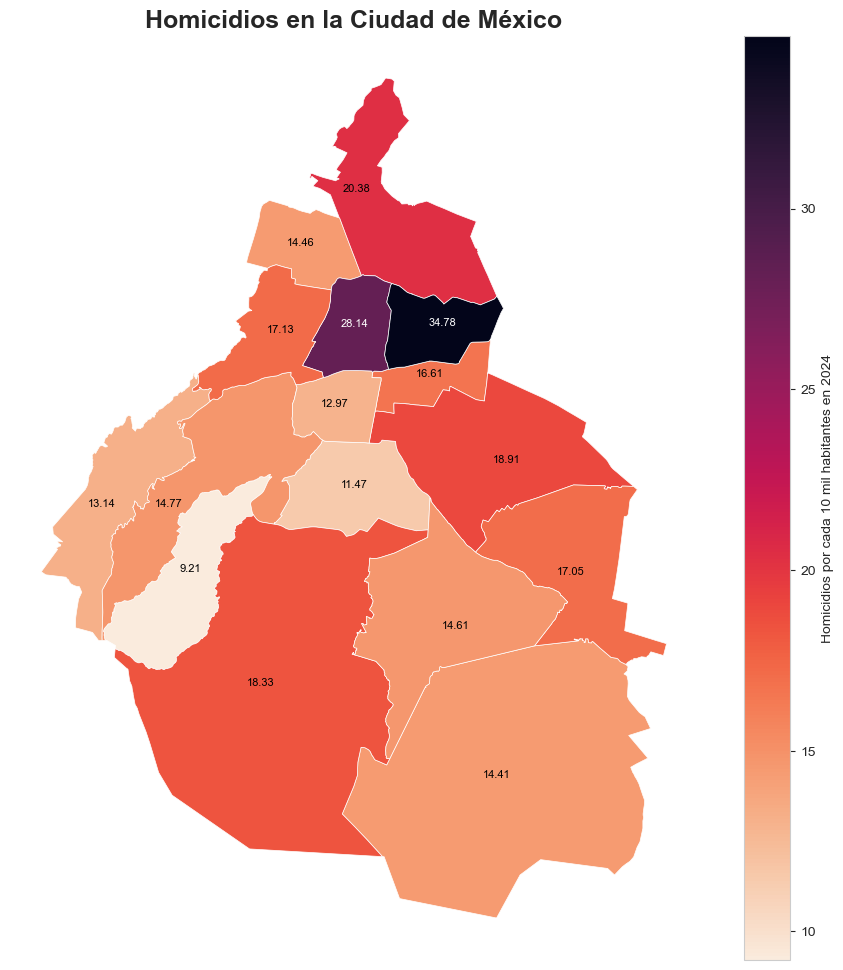

In [115]:
fig, ax = plt.subplots(figsize=(12, 12))

homicidios_cdmx.plot(column='Homicidios por cada 10 mil habitantes',
                ax=ax,
                legend=True,
                edgecolor="white",
                linewidth=.5,
                cmap="rocket_r", 
                legend_kwds={"label": "Homicidios por cada 10 mil habitantes en 2024"})

# add annotations 
for _, row in homicidios_cdmx.iterrows():
    # representative_point() for the label to be inside the polygon
    point = row.geometry.representative_point()
    annotation_text = f"{row['Homicidios por cada 10 mil habitantes']:.2f}"
    # make the ones higher than 100 white
    if row['Homicidios por cada 10 mil habitantes'] < 28:
        ax.annotate(text=annotation_text,
                    xy=(point.x, point.y),
                    horizontalalignment='center',
                    fontsize=8,
                    color='black')
    else:
        ax.annotate(text=annotation_text,
                    xy=(point.x, point.y),
                    horizontalalignment='center',
                    fontsize=8,
                    color='white')

ax.set_title("Homicidios en la Ciudad de México", fontsize=18, fontweight='bold')
ax.set_axis_off()

plt.savefig('homicidios-10k-habitantes.svg', format='svg', bbox_inches='tight')

plt.show()

# **ÍNDICE DE MORAN Y SU PSEUDO P-VALOR**

In [98]:
import numpy as np
from libpysal.weights import lag_spatial

# **1. Crear matriz de pesos espaciales basada en vecinos**
w = lps.weights.Queen.from_dataframe(robos_cdmx)
w.transform = "r"  # Normalización de los pesos

# **2. Calcular el Índice de Moran**
y = robos_cdmx["Robos por cada 10 mil habitantes"].values  # Variable de análisis
moran = esda.Moran(y, w, permutations=99999)

# **3. Imprimir resultados**
print(f"Índice de Moran: {moran.I}")
print(f"p-valor: {moran.p_sim}")  # Si p < 0.05, hay autocorrelación significativa

C:\Users\herie\AppData\Local\Temp\ipykernel_3868\2072399723.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(robos_cdmx)


Índice de Moran: 0.22231964804898735
p-valor: 0.03102


# **LA GRÁFICA DE DISPERSIÓN DE MORÁN Y EL HISTOGRAMA DE SU P-VALOR**

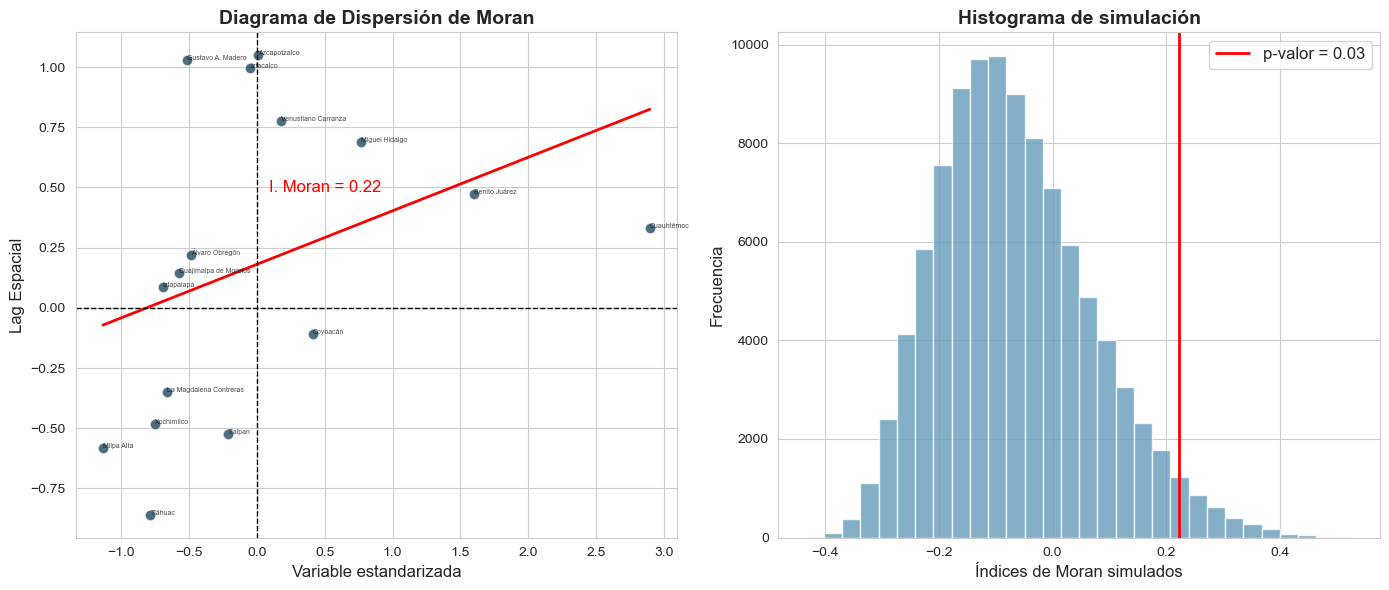

In [99]:
sns.set_style("whitegrid")

z = (y - y.mean()) / y.std()
w_lag = lag_spatial(w, z)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Diagrama de dispersión de Moran
axs[0].scatter(z, w_lag, color="#003049", edgecolor="w", s=60, alpha=0.7)
slope, intercept = np.polyfit(z, w_lag, 1)
x_vals = np.linspace(z.min(), z.max(), 100)
axs[0].plot(x_vals, intercept + slope * x_vals, color="red", linestyle="-", linewidth=2)

# Add dark lines at x=0 and y=0
axs[0].axhline(0, color="black", linewidth=1, linestyle="--")
axs[0].axvline(0, color="black", linewidth=1, linestyle="--")

axs[0].set_title("Diagrama de Dispersión de Moran", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Variable estandarizada", fontsize=12)
axs[0].set_ylabel("Lag Espacial", fontsize=12)
# add label to the slope
axs[0].text(0.5, 0.5, f"I. Moran = {slope:.2f}", fontsize=12, color="red", ha='center', va='center')

# add annotation to the points
for i, txt in enumerate(robos_cdmx['Municipio']):
    axs[0].annotate(txt, (z[i], w_lag[i]), fontsize=5, color="black", alpha=0.7)

axs[0].grid(True)

# Histograma de la distribución simulada de índices de Moran
axs[1].hist(moran.sim, bins=30, color="#669bbc", edgecolor="w", alpha=0.8)
axs[1].axvline(moran.I, color="red", linewidth=2,
               label=f"p-valor = 0.03")
axs[1].set_title("Histograma de simulación", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Índices de Moran simulados", fontsize=12)
axs[1].set_ylabel("Frecuencia", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.savefig('moran-diagram.svg', format='svg', bbox_inches='tight')
plt.show()

# **MAPA DE CLUSTERES DEL ÍNDICE DE MORÁN LISA**

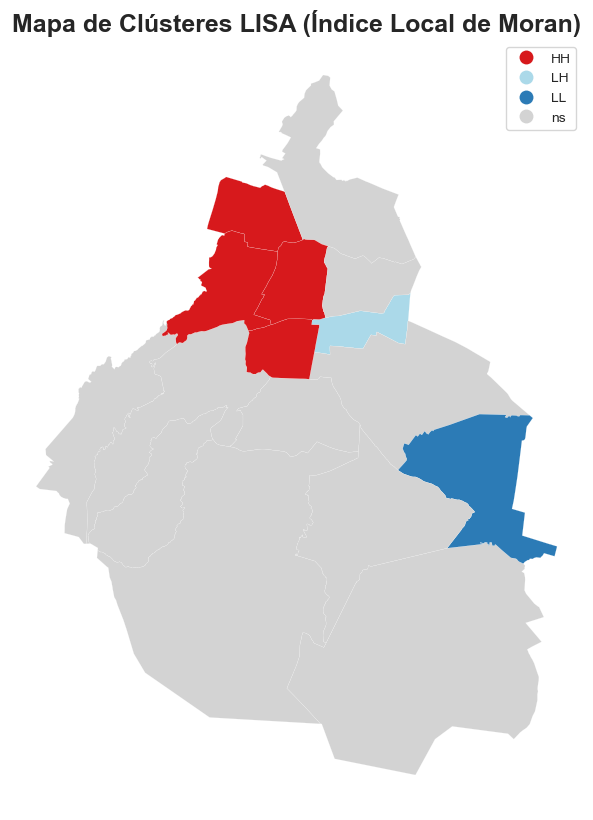

In [100]:
# Calcular el Índice Local de Moran (LISA)
lisa = esda.Moran_Local(y, w)

# Crear el mapa de clusters LISA
fig, ax = plt.subplots(1, figsize=(10, 10))
lisa_cluster(lisa, robos_cdmx, p=0.05, ax=ax)
ax.set_title("Mapa de Clústeres LISA (Índice Local de Moran)", fontsize=18, fontweight='bold')
plt.savefig('lisa-cluster.svg', format='svg', bbox_inches='tight')
plt.show()

## **ÍNDICE DE MORAN BIVARIADO**

In [117]:
# Seleccionar variables para comparar
y1 = robos_cdmx["Robos por cada 10 mil habitantes"].values
y2 = homicidios_cdmx["Homicidios por cada 10 mil habitantes"].values

# Calcular Índice de Moran Bivariado
moran_bv = Moran_BV(y1, y2, w, permutations=99999)

print(f"Índice de Moran Bivariado: {moran_bv.I}")
print(f"p-valor: {moran_bv.p_sim}")

Índice de Moran Bivariado: 0.10737678615654617
p-valor: 0.20479


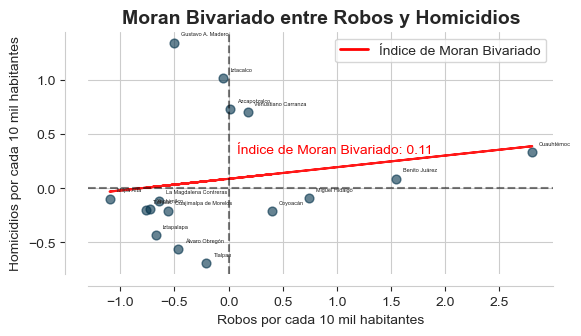

In [129]:
fig, ax = plt.subplots(figsize=(6, 10))
moran_scatterplot(moran_bv, ax=ax)

# Change the color of the regression line to 'red'
line = ax.lines[0]
line.set_color('red')

# Change the color of points to '#003049'
scatter = ax.collections[0]
scatter.set_facecolor('#003049')
scatter.set_edgecolor('#003049')

ax.set_title("Moran Bivariado entre Robos y Homicidios", fontsize=14, fontweight='bold')
ax.set_xlabel("Robos por cada 10 mil habitantes", fontsize=10)
ax.set_ylabel("Homicidios por cada 10 mil habitantes", fontsize=10)

# Annotate each point with its "Municipio" name.
points = scatter.get_offsets()
for i, (x, y) in enumerate(points):
    municipio = robos_cdmx.iloc[i]["Municipio"]
    ax.annotate(municipio, (x, y), textcoords="offset points", xytext=(5, 5), fontsize=4)

# Add annotation with moran_bv.I rounded to 2 decimals
ax.annotate(f"Índice de Moran Bivariado: {moran_bv.I:.2f}", xy=(0.32, 0.5),
            xycoords='axes fraction', fontsize=10, color='red')

# Create custom legend handle with the line colored in 'red'
line_handle = mlines.Line2D([], [], color='red', linestyle='-', linewidth=2,
                              label='Índice de Moran Bivariado')
ax.legend(handles=[line_handle], loc='best')

plt.savefig('moran-bivariado.svg', format='svg', bbox_inches='tight')
plt.show()

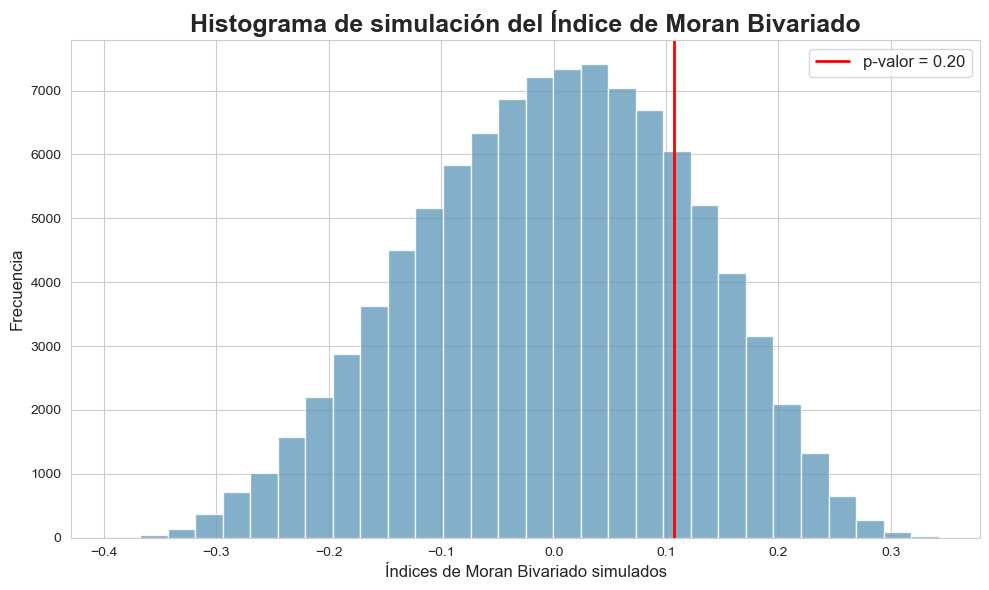

In [119]:
# histogram of the bivariate moran
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(moran_bv.sim, bins=30, color="#669bbc", edgecolor="w", alpha=0.8)
ax.axvline(moran_bv.I, color="red", linewidth=2,
           label=f"p-valor = {moran_bv.p_sim:.2f}")
ax.set_title("Histograma de simulación del Índice de Moran Bivariado", fontsize=18, fontweight='bold')
ax.set_xlabel("Índices de Moran Bivariado simulados", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
ax.legend(fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.savefig('moran-bivariado-histograma.svg', format='svg', bbox_inches='tight')
plt.show()

In [130]:
import numpy as np
from libpysal.weights import lag_spatial

# **1. Crear matriz de pesos espaciales basada en vecinos**
w = lps.weights.Queen.from_dataframe(homicidios_cdmx)
w.transform = "r"  # Normalización de los pesos

# **2. Calcular el Índice de Moran**
y = homicidios_cdmx["Homicidios por cada 10 mil habitantes"].values  # Variable de análisis
moran = esda.Moran(y, w, permutations=99999)

# **3. Imprimir resultados**
print(f"Índice de Moran: {moran.I}")
print(f"p-valor: {moran.p_sim}")  # Si p < 0.05, hay autocorrelación significativa

C:\Users\herie\AppData\Local\Temp\ipykernel_3868\2958674070.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(homicidios_cdmx)


Índice de Moran: 0.21887376874776013
p-valor: 0.03436


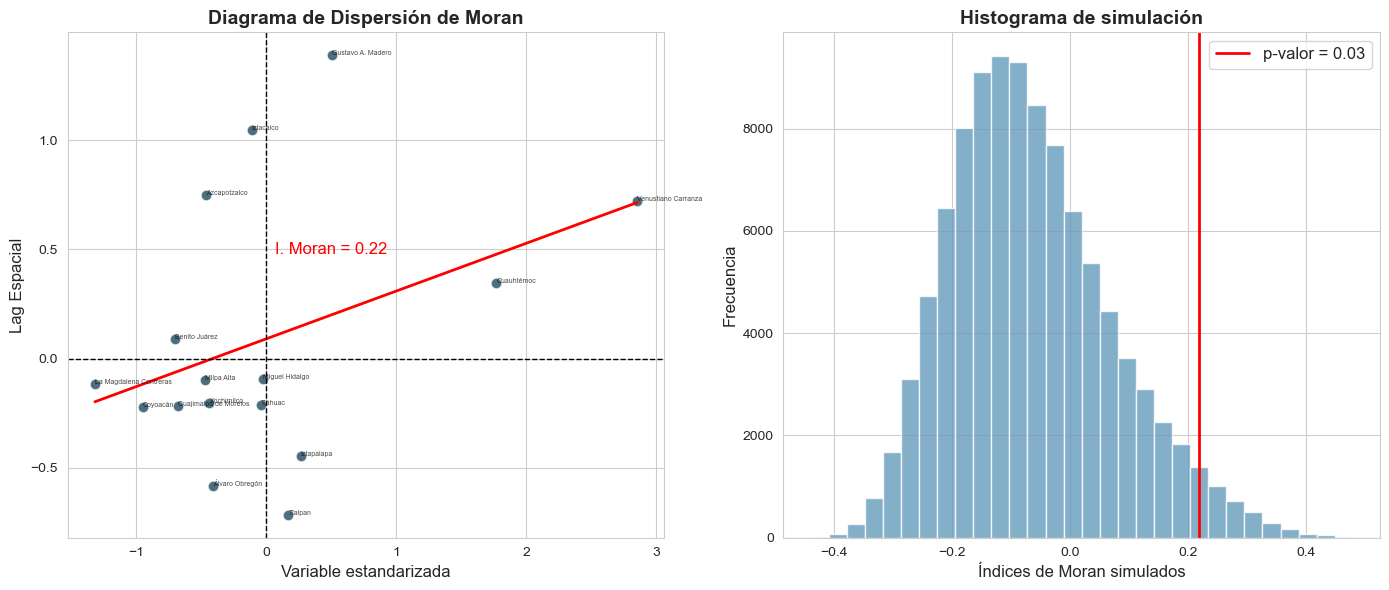

In [132]:
sns.set_style("whitegrid")

z = (y - y.mean()) / y.std()
w_lag = lag_spatial(w, z)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Diagrama de dispersión de Moran
axs[0].scatter(z, w_lag, color="#003049", edgecolor="w", s=60, alpha=0.7)
slope, intercept = np.polyfit(z, w_lag, 1)
x_vals = np.linspace(z.min(), z.max(), 100)
axs[0].plot(x_vals, intercept + slope * x_vals, color="red", linestyle="-", linewidth=2)

# Add dark lines at x=0 and y=0
axs[0].axhline(0, color="black", linewidth=1, linestyle="--")
axs[0].axvline(0, color="black", linewidth=1, linestyle="--")

axs[0].set_title("Diagrama de Dispersión de Moran", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Variable estandarizada", fontsize=12)
axs[0].set_ylabel("Lag Espacial", fontsize=12)
# add label to the slope
axs[0].text(0.5, 0.5, f"I. Moran = {slope:.2f}", fontsize=12, color="red", ha='center', va='center')

# add annotation to the points
for i, txt in enumerate(robos_cdmx['Municipio']):
    axs[0].annotate(txt, (z[i], w_lag[i]), fontsize=5, color="black", alpha=0.7)

axs[0].grid(True)

# Histograma de la distribución simulada de índices de Moran
axs[1].hist(moran.sim, bins=30, color="#669bbc", edgecolor="w", alpha=0.8)
axs[1].axvline(moran.I, color="red", linewidth=2,
               label=f"p-valor = 0.03")
axs[1].set_title("Histograma de simulación", fontsize=14, fontweight="bold")
axs[1].set_xlabel("Índices de Moran simulados", fontsize=12)
axs[1].set_ylabel("Frecuencia", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.savefig('moran-diagram.svg', format='svg', bbox_inches='tight')
plt.show()

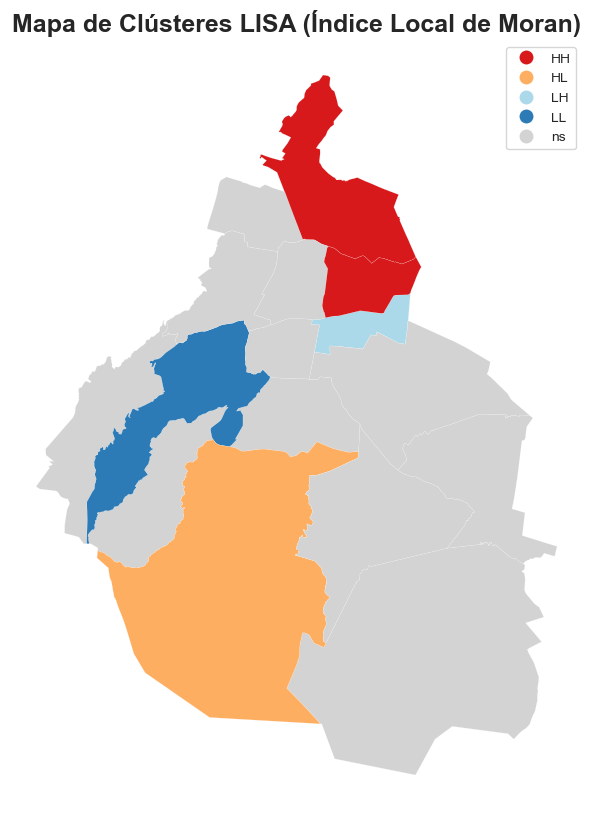

In [131]:
# Calcular el Índice Local de Moran (LISA)
lisa = esda.Moran_Local(y, w)

# Crear el mapa de clusters LISA
fig, ax = plt.subplots(1, figsize=(10, 10))
lisa_cluster(lisa, robos_cdmx, p=0.05, ax=ax)
ax.set_title("Mapa de Clústeres LISA (Índice Local de Moran)", fontsize=18, fontweight='bold')
plt.savefig('lisa-cluster.svg', format='svg', bbox_inches='tight')
plt.show()